### INTRODUCTION

The dataset for this project is the No-Show Appointment data, originally sourced from Kaggle. The dataaset contains medical
appointment information collected in Brazil. The dataset contains 14 columns representing the different characters of patients and detaiuls of each appointments as represented on the over 100,000 rows.
The columns were as listed below, showing what each column truly represent.
Analysis of this dataset would give us an insight as to how people have been responsing to their medical appointment and would provide answers to critical questions such as why certain categories of people are showing up for appointment more than others, why a particular day has been experiencing high frequency of people honouring their appointment or why people suffering from certain diseases have been consistently absent from Appointments. These and many more insights are what this dataset could avail us.

##1. PatientId : Thisis the identity of each patients
##2. AppointmentID: This is the unique number for each scheduled appointment
##3. Gender: This is the sex of the patient
##4. ScheduledDay: The day preferred and chosen by the patients while booking the appointment
##5. ApointmentDay: The day approved for appointment by the care-giver.
##6. Age: Age of patient
##7. Neighbourhood:Location of each patient
##8. Scholarship: This column shows '1' if patient is on the Brazilian Bolsa familia health insurance and '0' if otherwise.
##9. Hipertension: Indicates '1' or '0' if patients suffers from this disease or otherwise respectively
##10. Diabetes: Indicates '1' or '0' if patients suffers from this disease or otherwise respectively
##11. Alcoholism: Indicates '1' or '0' if patients suffers from this disease or otherwise respectively
##12. Handcap: Indicates '1' or '0' if patients suffers from this disease or otherwise respectively
##13.Sms-Received: Indicates '1' or '0' if patients received SMS or otherwise respectively
##14. No-show: Indicates 'Yes' or 'No' if patients didnt show up for appointment or otherwise respectively.

Having studied this dataset, the following questions would be considered in this project and I would be looking to provide answers to them:
1. Does increase in Number of Wait days affect Showing up for Appointment?
2. What is the distribution of Females and males in the dataset?
3. Is there any relationship between Age and Showing up?
4. Does receiving message(SMS) has an effect on Showing up for appointment?
5. The chart above shows that there is no significant relationship between enrollment in the scholarship scheme and showing up for Appointment.
6. Is there a relationship between Day of Week and Showing up for Appointment?
7. What is the count of males and females?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\med_report.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

## DATA WRANGLING

To wrangle and clean this data for easy analysis, the PatientId and AppointmentID column were dropped as they are of no great importance for this analysis. 
The column name for the No-show Appointrment column was changed to have an (_) instead of a (-) in order to allow some function work properly during analysis.
The datatype for SceduledDay column and AppointmentDay column were changed from string to datetime so we can easily calculate the date_diff.
In other to determine the number of days between the Scheduled day and Appointment day a new column named 'diff_day' was created
To determine the day of week each appointment took place, another column named 'Day_of_week' was created which made the number of columns back to 14 after two columns were initially dropped.

In [6]:
#To investigate our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.shape

(110527, 14)

In [8]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

In [9]:
#Further check to ascertain the datatypes of these two columns
type(df['ScheduledDay'][0])
type(df['AppointmentDay'][0])

str

The info above shows that we do not have any missing values. However, the AppointmentDay and ScheduledDay is not in datetime datatype format. We will need to fix this in other to have the right format to work with.

In [10]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [11]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

The PatientID and AppointmentID columns are of no great importance in answering our questions, so they can be dropped, leaving us with 12 columns.

In [12]:
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [13]:
df.head()

Gender              ScheduledDay            AppointmentDay  Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  
0        0             0      No  
1        0             0      No  
2        0             0      No  
3        0             0      No  
4        0             0      No

Above is our dataset without the two dropped columns, givings us 12 columns. We would now create two more columns for date difference and day_of_week the AppointmentDay falls.

In [14]:
df['diff_days'] = (df['AppointmentDay'] - df['ScheduledDay']) / np.timedelta64(1, 'D')
df.head()

Gender              ScheduledDay            AppointmentDay  Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  diff_days  
0        0             0      No  -0.776481  
1        0             0      No  -0.672535  
2        0             0      No  -0.679907  
3        0             0      No  -0.728831  
4        0             0      No  -0.671794

In [15]:
df['Day_of_week'] = df['AppointmentDay'].dt.day_name()
df.head()

Gender              ScheduledDay            AppointmentDay  Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No-show  diff_days Day_of_week  
0        0             0      No  -0.776481      Friday  
1        0             0      No  -0.672535      Friday  
2        0             0      No  -0.679907      Friday  
3        0             0      No  -0.728831      Friday  
4        0             0      No  -0.671794      Friday

We now have 14 columns after adding the two new columns as seen below

In [16]:
df.shape

(110527, 14)

Lastly, we need to do a column name change for the 'No-show' column. To make our analysis easy, we need to change the (-) to (_) as seen below 

In [17]:
df.rename(columns = {'No-show':'No_show'}, inplace=True)
df.head()

Gender              ScheduledDay            AppointmentDay  Age  \
0      F 2016-04-29 18:38:08+00:00 2016-04-29 00:00:00+00:00   62   
1      M 2016-04-29 16:08:27+00:00 2016-04-29 00:00:00+00:00   56   
2      F 2016-04-29 16:19:04+00:00 2016-04-29 00:00:00+00:00   62   
3      F 2016-04-29 17:29:31+00:00 2016-04-29 00:00:00+00:00    8   
4      F 2016-04-29 16:07:23+00:00 2016-04-29 00:00:00+00:00   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA            0             1         0           0   
1    JARDIM DA PENHA            0             0         0           0   
2      MATA DA PRAIA            0             0         0           0   
3  PONTAL DE CAMBURI            0             0         0           0   
4    JARDIM DA PENHA            0             1         1           0   

   Handcap  SMS_received No_show  diff_days Day_of_week  
0        0             0      No  -0.776481      Friday  
1        0             0      No  -0.672535      Friday  
2        0             0      No  -0.679907      Friday  
3        0             0      No  -0.728831      Friday  
4        0             0      No  -0.671794      Friday

As seen above, we now have our column_names in the same format.

## EXPLORATORY DATA ANALYSIS

For our analysis we would be answering some questions.

## Question 1:
Does increase in Number of Wait days affect Showing up for Appointment?

To answer this question, we would need to first categorise those who Show up (Present) for Appointment and those who didn't(Absent), as seen below. 

In [18]:
Absent = df.No_show == 'Yes'

In [19]:
Present = df.No_show == 'No'

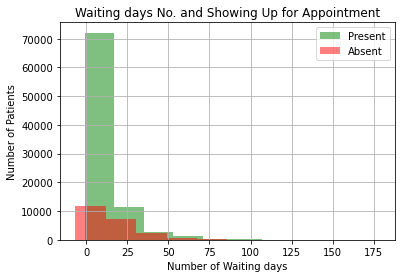

In [41]:
df.diff_days[Present].hist(alpha=0.5, color = 'green', label = 'Present')
df.diff_days[Absent].hist(alpha=0.5, color = 'red', label = 'Absent')
plt.legend();
plt.ylabel('Number of Patients')
plt.xlabel('Number of Waiting days')
plt.title('Waiting days No. and Showing Up for Appointment');

The green colour bar shows the number of people who show up for Appointmenmt and the green for those who were Absent. 
The red on the negative side are for the negative values on the waitlist which indicate people who were given
appointment day on days on days before their scheduled day (e.g someone who booked/scheduled an appointment for june 5
and ended up getting an appointment day for june 1). Our result shows these set of people didnt show up for the appointment.

## Question 2
What is the distribution of Females and males in the dataset?

To answer the question, we would look at the number

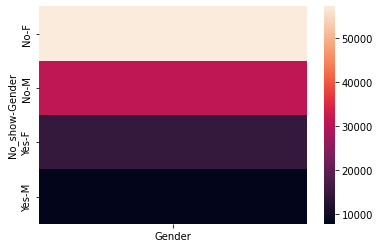

In [49]:
Gender_dist = df.groupby('No_show')['Gender'].value_counts().to_frame(
Gender_dist
sns.heatmap(Gender_dist);

The heatmap above shows the distribution of males and females in the dataframe. About 50,000 females were Present for Appointment while less than 20,000 were Absent on Appointment day. Foe males, About 30,000 were Present for Appointment while less than 10,000 were Absent on Appointment day.


## QUESTION 3

Is there any relationship between Age and Showing up? 

To answer this question we would look at the age distribution compared to rate of showing up

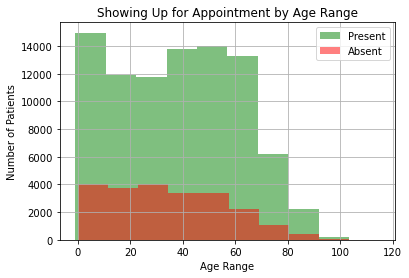

In [40]:
df.Age[Present].hist(alpha=0.5, color = 'green', label = 'Present')
df.Age[Absent].hist(alpha=0.5, color = 'red', label = 'Absent')
plt.legend();
plt.ylabel('Number of Patients')
plt.xlabel('Age Range')
plt.title('Showing Up for Appointment by Age Range');

The histogram chart above shows that most Appointment were scheduled for children. It also shows the rate of showing up for Appointment is lowest in Teenagers and young Adult

## QUESTION 4

Does receiving message(SMS) has an effect on Showing up for appointment?


In [42]:
def sms_received():
    df.SMS_received[Present].hist(alpha=0.5, color = 'green', label = 'Present')
    df.SMS_received[Absent].hist(alpha=0.5, color = 'red', label = 'Absent')
    plt.legend();
    plt.ylabel('Number of Patients')
    plt.xlabel('Received SMS (1 = "Yes", 0 = "No") ')
    plt.title('Received SMS and Showing Up for Appointment');

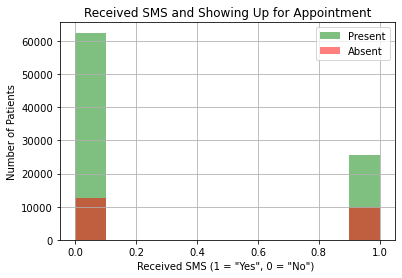

In [43]:
sms_received()

The chart above shows that receiving SMS really has no effect on showing up for Apppointment. Larger amount of people who received SMS (those with value of 1) didn't show up compared to those who didnt receive SMS (value of 0) and showed up for Appointment.

## Question 5

Does enrolment in the Brasilian Welfare program relates with showing up for Appointment?

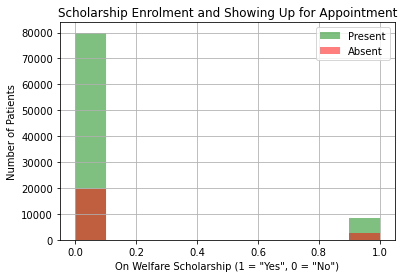

In [44]:
df.Scholarship[Present].hist(alpha=0.5, color = 'green', label = 'Present')
df.Scholarship[Absent].hist(alpha=0.5, color = 'red', label = 'Absent')
plt.legend();
plt.ylabel('Number of Patients')
plt.xlabel('On Welfare Scholarship (1 = "Yes", 0 = "No")')
plt.title('Scholarship Enrolment and Showing Up for Appointment');

The chart above shows that there is no significant relationship between enrollment in the scholarship scheme and showing up for Appointment.

## QUESTION 6

Is there a relationship between Day of Week and Showing up for Appointment?

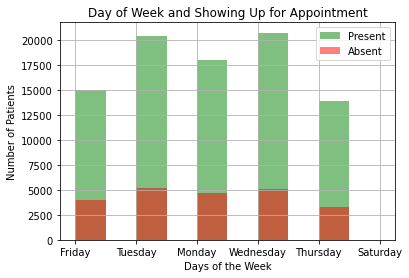

In [46]:
df.Day_of_week[Present].hist(alpha=0.5, color = 'green', label = 'Present')
df.Day_of_week[Absent].hist(alpha=0.5, color = 'red', label = 'Absent')
plt.legend();
plt.ylabel('Number of Patients')
plt.xlabel('Days of the Week')
plt.title('Day of Week and Showing Up for Appointment');

The chart above shows no significant relationship between Day of Week and showing up for Appointment

## QUESTION 7

What is the count of males and females?

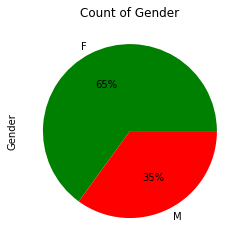

In [33]:
df.Gender.value_counts().plot(kind='pie', title = 'Count of Gender', autopct='%1.0f%%', colors= ['green', 'red']);

The chart above shows no significant relationship between Day of Week and showing up for Appointment

## CONCLUSION

Having gone through the exploration of our dataset. The following conclusion can be reached

1. There are more females who scheduled and show up for Appointment than male but no significant diffeence in the rate of showing up for Appointment between them
2. Children are likely to show up for Appointment than any other age category
3. Teenagers and Young Adult have the lowest rate of showing up for Appointment
4. Enrolmemnt in Bolsa Familia Brazilian health insurance does not have any relationship with showing up for Appointment
5. People whose Appointment was backdated from Scheduled date are not likely to show up for the Appointment.
6. Is there a relationship between Day of Week and Showing up for Appointment?
7. What is the count of males and females?

## LIMITATIONS

The dataset doesnot contain data for Appointments that took place on Saturday. This data could have helped us see why Young Adults have the lowest rate of Showing up for Appointments, since saturday may likely be a work free day.